<a href="https://colab.research.google.com/github/harddy-bit/Cat-Dog-Classification-Using-Transfer-Learning-InceptionV3/blob/main/Cat_Dog_Classification_using_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!nvidia-smi

Mon Feb  8 08:53:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    29W /  70W |    227MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.__version__

'2.4.1'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/training_set'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/test_set'

In [8]:
# Here we will be using imagenet weights

inceptv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [9]:
inceptv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# don't train existing weights
for layer in inceptv3.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/training_set/*')

In [12]:
folders

['/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/training_set/cats',
 '/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/training_set/dogs']

In [13]:
# our layers - you can add more if you want
x = Flatten()(inceptv3.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object -- combine the input of inceptionv3 and output dense layer as prediction
model = Model(inputs=inceptv3.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
250/250 [==============================] - 2670s 11s/step - loss: 0.9800 - accuracy: 0.9330 - val_loss: 0.3018 - val_accuracy: 0.9845
Epoch 2/20
250/250 [==============================] - 113s 454ms/step - loss: 0.2866 - accuracy: 0.9818 - val_loss: 0.5812 - val_accuracy: 0.9790
Epoch 3/20
250/250 [==============================] - 112s 447ms/step - loss: 0.1794 - accuracy: 0.9917 - val_loss: 0.3414 - val_accuracy: 0.9870
Epoch 4/20
250/250 [==============================] - 112s 449ms/step - loss: 0.2570 - accuracy: 0.9861 - val_loss: 0.4000 - val_accuracy: 0.9855
Epoch 5/20
250/250 [==============================] - 112s 446ms/step - loss: 0.3052 - accuracy: 0.9876 - val_loss: 0.9021 - val_accuracy: 0.9790
Epoch 6/20
250/250 [==============================] - 112s 447ms/step - loss: 0.3334 - accuracy: 0.9873 - val_loss: 0.5357 - val_accuracy: 0.9880
Epoch 7/20
250/250 [==============================] - 112s 447ms/step - loss: 0.2075 - accuracy: 0.9923 - val_loss: 0.5401 - 

In [21]:
from tensorflow.keras.models import load_model

model.save('/content/gdrive/MyDrive/Colab Notebooks/Cat Dog Classification Using InceptionV3/model_inceptv3_catdog.h5')

In [22]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Cat Dog Classification Using InceptionV3/model_inceptv3_catdog.h5')

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

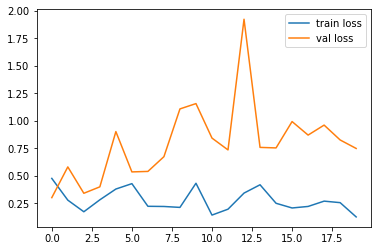

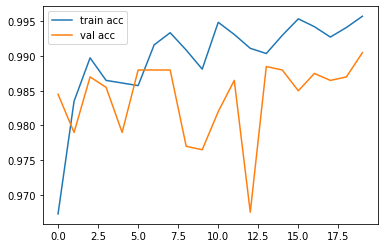

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Cat Dog Classification Using InceptionV3/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Cat Dog Classification Using InceptionV3/AccVal_acc')

In [25]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
img=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/dogs-cats-dataset/dataset/test_set/cats/cat.4003.jpg',target_size=(224,224))

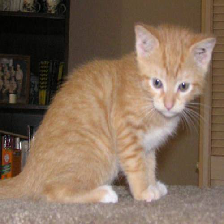

In [31]:
img

In [39]:
test_image = image.img_to_array(img)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [40]:
result

array([[1., 0.]], dtype=float32)

In [41]:
a=np.argmax(model.predict(test_image), axis=1)

In [42]:
a

array([0])

In [43]:
if a==0:
  print("The image classified is Cat")
else:
  print("The image classified is Dog")

The image classified is Cat
